In [1]:
using Pkg
Pkg.activate("/Users/ryansenne/Documents/GitHub/SSM")
# Pkg.activate("/home/ryansenne/PycharmProjects/ssm_julia/")

  Activating project at `\Users\ryansenne\Documents\GitHub\SSM`

In [2]:
include("/Users/ryansenne/Documents/Github/SSM/src/SSM.jl")
# include("/home/ryansenne/PycharmProjects/ssm_julia/src/SSM.jl")
using .SSM
using LinearAlgebra
using Distributions
using Random
using Plots

In [3]:
Random.seed!(3)
N = 500  # Number of data points
D = 2    # Number of dimensions
K = 2

# Create synthetic data from two Gaussians
μ1, μ2 = [-5,  -5], [-4, -2.5]
Σ1, Σ2 = [1.0 0.1; 0.1 1.0], [1.0 -0.8; -0.8 1.0]

data1 = rand(MvNormal(μ1, Σ1), N ÷ 2)
data2 = rand(MvNormal(μ2, Σ2), N ÷ 2)

# Concatenate to form a single dataset
data = transpose(hcat(data1, data2))
data = copy(data)

gmm = SSM.GMM(K, D, data)
SSM.log_likelihood(gmm, data)

-2095.276371189694

In [4]:
# first let's use kmeans_clustering to show the relationship between the methods
kmeans_clustering(data, K)

([-4.385464161371049 -4.731048816492255; -2.3724936848086275 -5.0960068838375365], [1, 2, 2, 2, 2, 2, 2, 2, 2, 2  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 2])

In [4]:
SSM.fit!(gmm, data, tol=1e-6)

Iteration: 1, Log-likelihood: -1613.949580538019
Iteration: 2, Log-likelihood: -1606.55284169867
Iteration: 3, Log-likelihood: -1600.7105807819041
Iteration: 4, Log-likelihood: -1596.0798782826414
Iteration: 5, Log-likelihood: -1592.5055798320618
Iteration: 6, Log-likelihood: -1589.802497779063
Iteration: 7, Log-likelihood: -1587.804308189805
Iteration: 8, Log-likelihood: -1586.372981669861
Iteration: 9, Log-likelihood: -1585.385949107168
Iteration: 10, Log-likelihood: -1584.7300233056772
Iteration: 11, Log-likelihood: -1584.3065336169686
Iteration: 12, Log-likelihood: -1584.0379690834375
Iteration: 13, Log-likelihood: -1583.8690655171054
Iteration: 14, Log-likelihood: -1583.7630343642902
Iteration: 15, Log-likelihood: -1583.6963536114094
Iteration: 16, Log-likelihood: -1583.6542758495088
Iteration: 17, Log-likelihood: -1583.627618884763
Iteration: 18, Log-likelihood: -1583.6106659948764
Iteration: 19, Log-likelihood: -1583.5998465138205
Iteration: 20, Log-likelihood: -1583.59292004485

Iteration: 27, Log-likelihood: -1583.5809911233985
Iteration: 28, Log-likelihood: -1583.5807822176205
Iteration: 29, Log-likelihood: -1583.5806467381908
Iteration: 30, Log-likelihood: -1583.5805588295532
Iteration: 31, Log-likelihood: -1583.5805017609416
Iteration: 32, Log-likelihood: -1583.5804646969432
Iteration: 33, Log-likelihood: -1583.5804406152902
Iteration: 34, Log-likelihood: -1583.580424962286
Iteration: 35, Log-likelihood: -1583.5804147835781
Iteration: 36, Log-likelihood: -1583.5804081616388
Iteration: 37, Log-likelihood: -1583.580403851422
Iteration: 38, Log-likelihood: -1583.5804010442598
Iteration: 39, Log-likelihood: -1583.5803992147523
Iteration: 40, Log-likelihood: -1583.5803980214316
Iteration: 41, Log-likelihood: -1583.580397242307
Convergence reached at iteration 41


In [5]:
gmm.class_labels

500-element Vector{Int64}:
 2
 2
 2
 2
 2
 2
 2
 2
 2
 2
 ⋮
 1
 1
 1
 1
 1
 1
 1
 1
 1

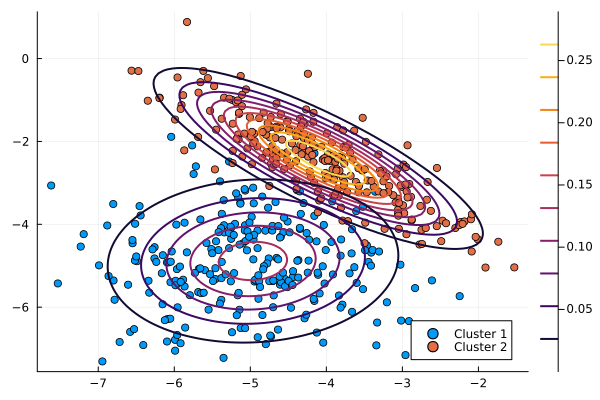

In [6]:
scatter(data[1:250, 1], data[1:250, 2], label="Cluster 1", legend=:bottomright)
scatter!(data[251:500, 1], data[251:500, 2], label="Cluster 2")

# Define a function to evaluate the multivariate Gaussian
function evaluate_mvg(x, y, μ, Σ)
    pos = [x, y]
    return pdf(MvNormal(μ, Σ), pos)
end

# Generate a grid for the contour
xmin, xmax = extrema(data[:, 1])
ymin, ymax = extrema(data[:, 2])
xrange = range(xmin, stop=xmax, length=100)
yrange = range(ymin, stop=ymax, length=100)

# Plot each Gaussian in the GMM
for k in 1:gmm.k_means
    Z = [evaluate_mvg(x, y, gmm.μ_k[:, k], gmm.Σ_k[k]) for x in xrange, y in yrange]
    contour!(xrange, yrange, Z', levels=10, linewidth=2, label="Gaussian $k")
end

# Show the plot
plot!()

In [7]:
data = randn(100, 1)
test_vector = SSM.GMM(2, 1, data)

GMM(2, [0.9571717936016916 -2.501406704569572], [[1.0;;], [1.0;;]], [0.5, 0.5], [0.0 0.0; 0.0 0.0; … ; 0.0 0.0; 0.0 0.0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0])